In [3]:
import psycopg2
import sys, os
import numpy as np
import pandas as pd
# import db_credentials as creds
# import load_pd_dataframe as load_df
import pandas.io.sql as psql
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib
import matplotlib.pyplot as plt
import openpyxl

In [2]:
#Set up a connection to the postgres server
conn_string = "dbname='impulsify' user='postgres' host='localhost'"
conn=psycopg2.connect(conn_string)
print("Connected!")

#Create a cursor object
cursor = conn.cursor()

def load_pd_dataframe(table, schema='public'):
    sql_command = "SELECT * FROM {}.{};".format(str(schema), str(table))
    print(sql_command)
    
    #Load the data
    data = pd.read_sql(sql_command, conn)
    print(data.shape)
    return data

Connected!


In [4]:
performance_2019 = pd.read_excel('../data/2019_sales_by_month.xlsx')
print (performance_2019)

Property Name Property Code  Brand  \
0                        Hilton Garden Inn Times Square         NYCMW  Hilto   
1                          InterContinental New Orleans         MSYHA  Inter   
2     DoubleTree Suites by Hilton Hotel Boston - Cam...         BOSSB  Doubl   
3       Hilton Garden Inn New Orleans Convention Center         MSYGI  Hilto   
4             Crowne Plaza Fredericton-Lord Beaverbrook         YFCQS  Crown   
...                                                 ...           ...    ...   
4502                     Hilton Garden Inn Wilkes Barre         AVPWI  Hilto   
4503    Hampton Inn & Suites Birmingham Hoover Galleria         BHMRC  Hampt   
4504  Tru by Hilton Nashville Downtown Convention Ce...         BNARU  Tru b   
4505                   Hampton Inn Raleigh/Clayton I-40         RDUCL  Hampt   
4506                                                NaN           NaN   4506   

          #Rooms             Management Company Registration Date  \
0     369.00

In [6]:
performance_2019.isnull().sum()
dropping_nans = performance_2019.dropna(subset=['Property Code'])
# dropping_nans[dropping_nans['Management Company'].isnull()]

In [7]:
dropping_nans.sort_values('Brand')
dropping_nans.replace(to_replace='Tru B', value='Tru b', inplace=True)
dropping_nans.replace(to_replace='TRU B', value='Tru b', inplace=True)
dropping_nans.replace(to_replace='TRU b', value='Tru b', inplace=True)

brand_counts = dropping_nans['Brand'].value_counts()
print(brand_counts)
print(len(brand_counts))

Hilto    1343
Hampt     852
Tru b     743
Homew     380
Crown     294
Embas     243
Home2     218
Doubl     137
Holid      64
Hotel      33
Candl      30
The S      28
Avid       25
Comfo      20
IHG A      18
Stayb      12
La Qu      12
Inter      12
Blueb      11
Renai      11
Delta       7
Best        4
Quali       3
Miram       2
Platt       1
Aston       1
Hammo       1
River       1
Name: Brand, dtype: int64
28
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [8]:
# dropping_nans.replace(to_replace='January', value=1, inplace=True)
# dropping_nans.replace(to_replace='February', value=2, inplace=True)
# dropping_nans.replace(to_replace='March', value=3, inplace=True)
# dropping_nans.replace(to_replace='April', value=4, inplace=True)
# dropping_nans.replace(to_replace='May', value=5, inplace=True)
# dropping_nans.replace(to_replace='June', value=6, inplace=True)
# dropping_nans.replace(to_replace='July', value=7, inplace=True)
# dropping_nans.replace(to_replace='August', value=8, inplace=True)
# dropping_nans.replace(to_replace='September', value=9, inplace=True)
# dropping_nans.replace(to_replace='October', value=10, inplace=True)
# dropping_nans.replace(to_replace='November', value=11, inplace=True)
# dropping_nans.replace(to_replace='December', value=12, inplace=True)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
value = 1
for month in months:
    dropping_nans.replace(to_replace=month, value=value, inplace=True)
    value+=1

dropping_nans

,Property Name,Property Code,Brand,#Rooms,Management Company,Registration Date,Activation Date,Last Transaction,Revenue,Profit Margin,Gross Profit,Pend Prod,Neg Inv,Low Prod Sales,Shift Rep Days,PMS Port,Column1,Month of Reporting
0,Hilton Garden Inn Times Square,NYCMW,Hilto,369.0,"Highgate Hotels, Inc.",2017-10-06,2017-10-27,2019-02-01 03:49:00,48190.59,0.72970,35164.64,76.0,119.0,NaN,a long time,35010.0,Details Use Archive,1
1,InterContinental New Orleans,MSYHA,Inter,484.0,Dimension Development Company,2018-08-17,2018-09-20,2019-02-01 05:39:00,22829.80,0.67301,15364.72,69.0,86.0,99.0,6 months,5011.0,Details Use Archive,1
2,DoubleTree Suites by Hilton Hotel Boston - Cam...,BOSSB,Doubl,308.0,Hilton Worldwide,2018-04-10,2018-06-11,2019-02-01 04:58:00,22488.70,0.69884,15715.96,36.0,165.0,NaN,6 months,35010.0,Details Use Archive,1
3,Hilton Garden Inn New Orleans Convention Center,MSYGI,Hilto,286.0,Interstate Hotels and Resorts,2018-06-27,2018-09-04,2019-02-01 05:52:00,15917.05,0.84608,13467.05,142.0,239.0,NaN,7 days,35010.0,Details Use Archive,1
4,Crowne Plaza Fredericton-Lord Beaverbrook,YFCQS,Crown,169.0,IHG - Crowne Plaza,2018-09-26,2019-02-11,2019-03-01 03:58:00,544.45,0.56147,305.69,NaN,1.0,NaN,about 21 hours,5011.0,Details Use Archive,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4501,Hilton Garden Inn Washington DC Downtown,DCACH,Hilto,300.0,Urgo Hotels,2015-05-27,2015-09-29,2020-01-01 04:03:00,570.00,0.74075,422.23,41.0,154.0,NaN,over 2 years,35010.0,Details Use Archive,12
4502,Hilton Garden Inn Wilkes Barre,AVPWI,Hilto,123.0,High Hotels Ltd.,2015-02-16,2015-06-02,2020-01-01 01:40:00,563.39,0.61661,347.39,12.0,8.0,124.0,about 1 month,35010.0,Details Use Archive,12
4503,Hampton Inn & Suites Birmingham Hoover Galleria,BHMRC,Hampt,102.0,Aum Enterprises Inc.,2015-06-27,2015-09-09,2019-12-31 23:59:59,562.50,0.76224,428.76,98.0,214.0,55.0,11 months,35010.0,Details Use Archive,12
4504,Tru by Hilton Nashville Downtown Convention Ce...,BNARU,Tru b,116.0,Kana Hotel Group,2019-03-25,2019-07-16,2019-12-10 17:14:00,546.75,0.65624,358.80,21.0,178.0,NaN,5 months,35010.0,Details Use Archive,12


In [9]:
#Closer look at HILTON ONLY
revenue_and_profit_columns = ['Property Name', 'Property Code', 'Brand', '#Rooms', 'Revenue', 'Profit Margin', 'Month of Reporting'] 
hilton_performance_2019 = dropping_nans.loc[dropping_nans["Brand"]=='Hilto']
hilton_performance_2019_subset = hilton_performance_2019[revenue_and_profit_columns]
HPS_sorted = hilton_performance_2019_subset.sort_values(['Property Code', 'Month of Reporting', '#Rooms'])
hilton_hotel_counts = HPS_sorted['Property Name'].value_counts()
# print(hilton_hotel_counts)
hilton_hotels = HPS_sorted['Property Name'].unique()
# print(hilton_hotels)
# print(HPS_sorted)
HPS_sorted['#Rooms'].max()

466.0

In [10]:
# hilt_GI_NY_midtown = HPS_sorted.loc[HPS_sorted['Property Name']=='Hilton Garden Inn New York Midtown Park Ave']
# print(hilt_GI_NY_midtown)
# hilt_GI_mobile_west = HPS_sorted.loc[HPS_sorted['Property Name']=='Hilton Garden Inn Mobile West I-65/Airport Blvd.']
# hilt_GI_bowling_green = HPS_sorted.loc[HPS_sorted['Property Name']=='Hilton Garden Inn Bowling Green']
# hilt_GI_corning_downtown = HPS_sorted.loc[HPS_sorted['Property Name']=='Hilton Garden Inn Corning Downtown']
# hilt_GI_denver_airport = HPS_sorted.loc[HPS_sorted['Property Name']=='Hilton Garden Inn Denver Airport']

Property Name       Hilton Dallas Plano Granite Park  Hilton Denver Inverness  \
Month of Reporting                                                              
1                                            0.58014                  0.67363   
2                                            0.58644                  0.66212   
3                                            0.59173                  0.67385   
4                                            0.56978                  0.65858   
5                                            0.62701                  0.66174   
6                                            0.66095                  0.66679   
7                                            0.66661                  0.68171   
8                                            0.69673                  0.67786   
9                                            0.70511                  0.67834   
10                                           0.71364                  0.65416   
11                          

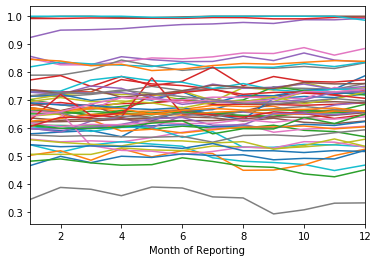

In [11]:
performance_pivot = HPS_sorted.pivot(index='Month of Reporting', columns='Property Name', values='Profit Margin')
performance_pivot_full = performance_pivot.dropna(axis=1, how='any')
print(performance_pivot_full)
performance_pivot_full.plot(legend=None)

In [12]:
small_hilton = HPS_sorted.loc[HPS_sorted['#Rooms'] <= 100]
med_hilton = HPS_sorted[(HPS_sorted['#Rooms'] >100) & (HPS_sorted['#Rooms'] <= 150)]
large_hilton = HPS_sorted[(HPS_sorted['#Rooms'] >150) & (HPS_sorted['#Rooms'] <= 250)]
xlarge_hilton = HPS_sorted.loc[HPS_sorted['#Rooms'] > 250]